In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten ,Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode='nearest',
                                   horizontal_flip = True)

In [3]:
training_set = train_datagen.flow_from_directory('PlantVillage/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5095 images belonging to 15 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
test_set = test_datagen.flow_from_directory('PlantVillage/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2586 images belonging to 15 classes.


In [6]:
training_set,test_set

(<keras.preprocessing.image.DirectoryIterator at 0x1f94989e400>,
 <keras.preprocessing.image.DirectoryIterator at 0x1f971e952e0>)

In [14]:
print("Training classes:", training_set.num_classes)
print("Test classes:", test_set.num_classes)
print(training_set.class_indices)

Training classes: 15
Test classes: 15
{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}


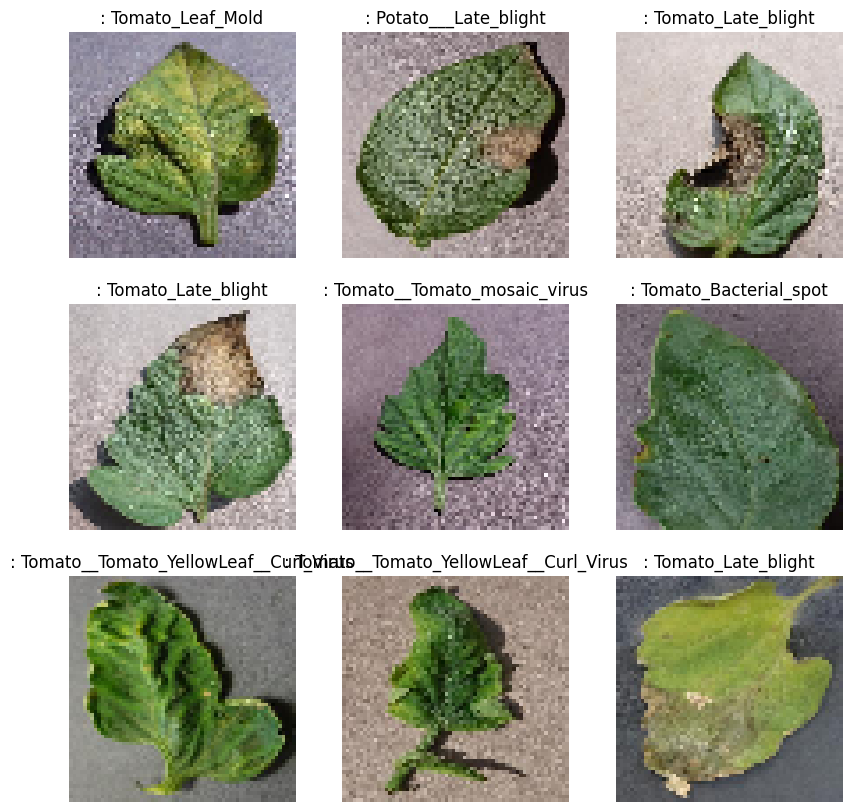

In [15]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(test_set)

class_indices = test_set.class_indices 
class_names = list(class_indices.keys())  
predicted_labels = np.argmax(labels, axis=1)

# Plot images with class names
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f": {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.show()

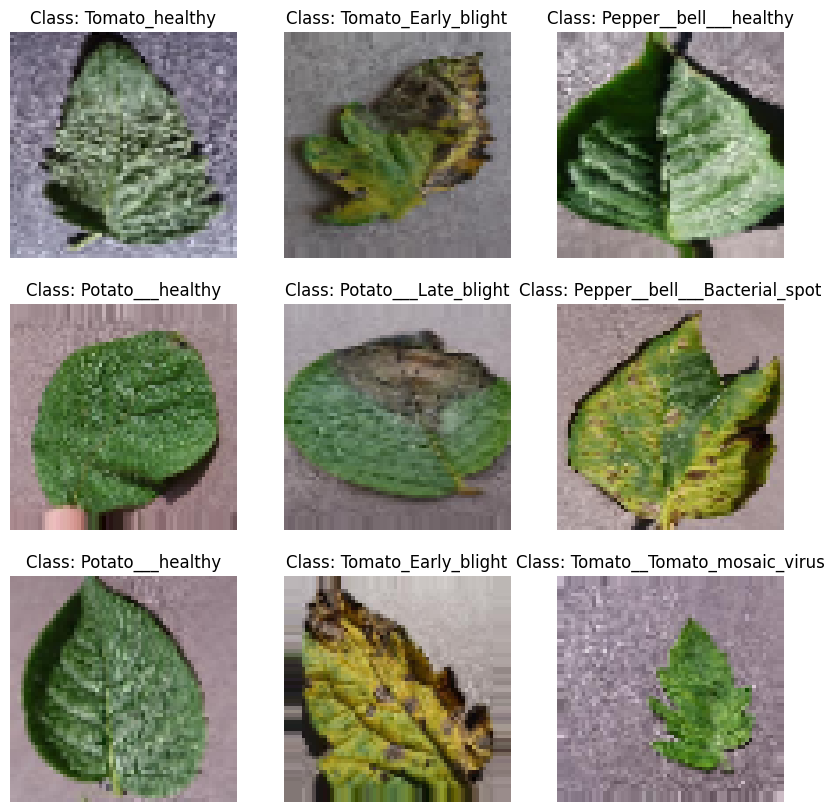

In [16]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(training_set)

class_indices = training_set.class_indices 
class_names = list(class_indices.keys())  
predicted_labels = np.argmax(labels, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.show()


In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [19]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [20]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [21]:

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [22]:

model.add(Flatten())

In [23]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=15, activation='softmax'))

In [24]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:

history=model.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
160/160 [==============================] - 22s 134ms/step - loss: 2.2863 - accuracy: 0.2465 - val_loss: 1.8589 - val_accuracy: 0.3968
Epoch 2/50
160/160 [==============================] - 20s 127ms/step - loss: 1.4550 - accuracy: 0.5311 - val_loss: 1.6934 - val_accuracy: 0.5023
Epoch 3/50
160/160 [==============================] - 19s 118ms/step - loss: 1.0669 - accuracy: 0.6542 - val_loss: 1.1487 - val_accuracy: 0.6346
Epoch 4/50
160/160 [==============================] - 19s 116ms/step - loss: 0.8527 - accuracy: 0.7093 - val_loss: 0.9400 - val_accuracy: 0.6883
Epoch 5/50
160/160 [==============================] - 19s 120ms/step - loss: 0.7268 - accuracy: 0.7604 - val_loss: 1.0450 - val_accuracy: 0.6810
Epoch 6/50
160/160 [==============================] - 19s 116ms/step - loss: 0.6550 - accuracy: 0.7766 - val_loss: 0.8582 - val_accuracy: 0.7169
Epoch 7/50
160/160 [==============================] - 19s 118ms/step - loss: 0.5916 - accuracy: 0.7945 - val_loss: 0.7726 - val_ac

In [28]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [29]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f} %")

81/81 [==============================] - 3s 35ms/step - loss: 0.2360 - accuracy: 0.9316
Test accuracy: 93.16 %


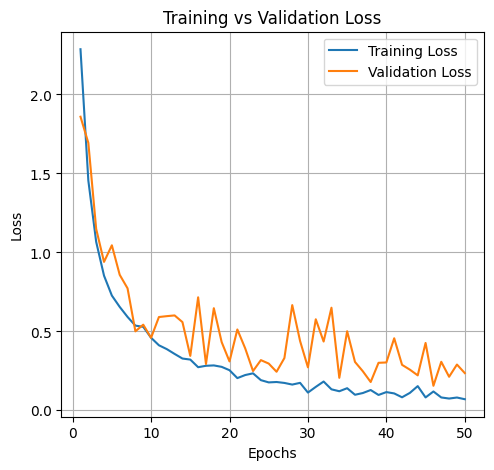

In [30]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

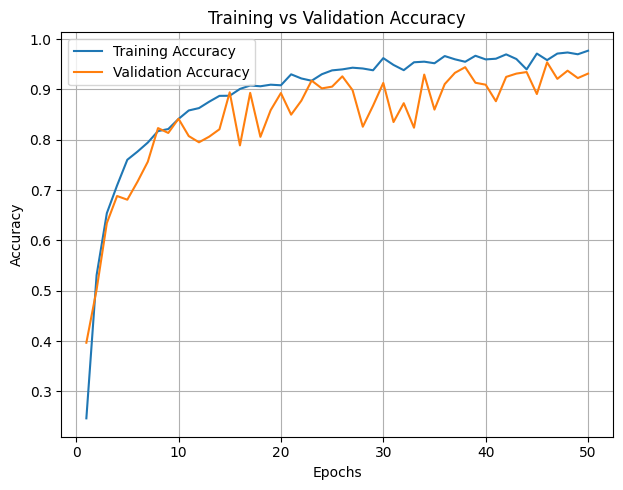

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

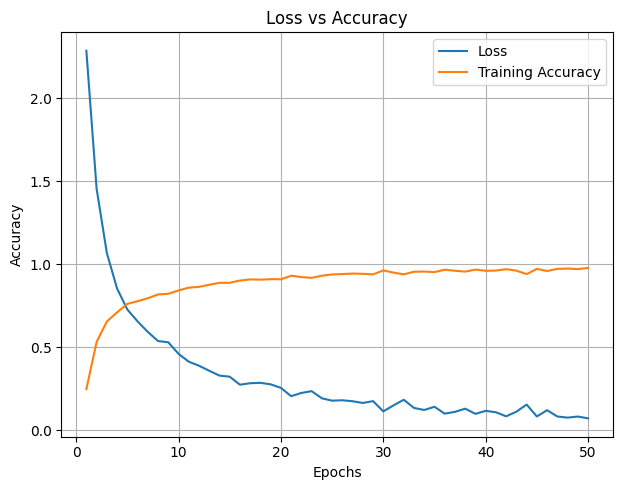

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Loss')
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.title('Loss vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [33]:
test_set.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [34]:

actual = np.empty(0)
pred = np.empty(0)

In [35]:

actual , pred

(array([], dtype=float64), array([], dtype=float64))

In [36]:
reverse_class_indices = {v: k for k, v in class_indices.items()} 

In [37]:

reverse_class_indices

{0: 'Pepper__bell___Bacterial_spot',
 1: 'Pepper__bell___healthy',
 2: 'Potato___Early_blight',
 3: 'Potato___Late_blight',
 4: 'Potato___healthy',
 5: 'Tomato_Bacterial_spot',
 6: 'Tomato_Early_blight',
 7: 'Tomato_Late_blight',
 8: 'Tomato_Leaf_Mold',
 9: 'Tomato_Septoria_leaf_spot',
 10: 'Tomato_Spider_mites_Two_spotted_spider_mite',
 11: 'Tomato__Target_Spot',
 12: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 13: 'Tomato__Tomato_mosaic_virus',
 14: 'Tomato_healthy'}

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_indices):
  
    test_image = tf.keras.utils.load_img(image_path, target_size=(64, 64))
    plt.imshow(test_image)
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0) / 255.0 
    
   
    result = model.predict(test_image)
    
    
    reverse_class_indices = {v: k for k, v in class_indices.items()}
    predicted_class_idx = np.argmax(result[0])
    confidence = np.max(result[0])
    
    
    plt.title(f"Predicted: {reverse_class_indices[predicted_class_idx]}\nConfidence: {confidence*100:.2f}%")
    plt.axis('off')
    plt.show()
    
    return reverse_class_indices[predicted_class_idx], confidence

1/1 [==============================] - 0s 75ms/step


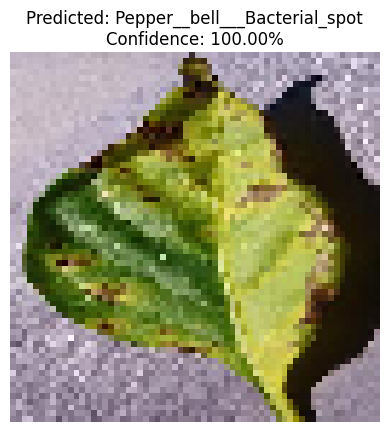

('Pepper__bell___Bacterial_spot', 0.99999547)

In [39]:
predict_image('PlantVillage/test/Pepper__bell___Bacterial_spot/c9e13908-bce6-4ad7-831f-a4a408cabf72___JR_B.Spot 3198.JPG',model,class_indices)


1/1 [==============================] - 0s 16ms/step


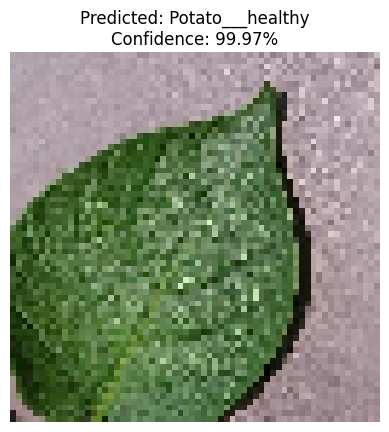

('Potato___healthy', 0.9997085)

In [40]:
predict_image('PlantVillage/test/Potato___healthy/0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG',model,class_indices)


1/1 [==============================] - 0s 16ms/step


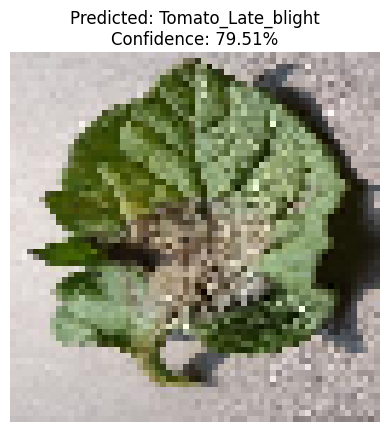

('Tomato_Late_blight', 0.7951012)

In [43]:
predict_image('PlantVillage/test/Tomato_Late_blight/e10eb7f2-7449-4061-bb0a-49fa55abd423___RS_Late.B 6718.JPG',model,class_indices)


In [42]:

y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes

81/81 [==============================] - 3s 34ms/step


In [44]:
print(y_pred)


[[3.27529597e-06 1.01222991e-04 3.42090871e-08 ... 2.19513934e-19
  1.12439929e-15 1.01683691e-16]
 [6.05400674e-10 2.73602922e-07 9.99856472e-01 ... 1.30310328e-16
  9.98506658e-17 8.35975646e-12]
 [3.92716029e-04 1.28163788e-06 1.52871266e-07 ... 1.96178187e-12
  1.13215286e-12 3.30129092e-06]
 ...
 [6.01693684e-23 6.18418684e-21 1.23139405e-19 ... 6.53209778e-11
  6.28592041e-26 1.92376835e-14]
 [5.35500897e-12 6.88823798e-09 1.48001736e-05 ... 2.24226144e-18
  6.58784686e-14 2.39502618e-09]
 [3.81763279e-13 1.32810995e-24 1.60618686e-15 ... 2.05575054e-12
  1.30531299e-22 2.91509987e-18]]


In [47]:

print(classification_report(y_true, y_pred_classes, target_names=class_names))

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.05      0.04      0.05       134
                     Pepper__bell___healthy       0.02      0.02      0.02        62
                      Potato___Early_blight       0.00      0.00      0.00        52
                       Potato___Late_blight       0.07      0.07      0.07       209
                           Potato___healthy       0.06      0.05      0.05       152
                      Tomato_Bacterial_spot       0.10      0.09      0.09       279
                        Tomato_Early_blight       0.04      0.04      0.04       136
                         Tomato_Late_blight       0.07      0.06      0.07       217
                           Tomato_Leaf_Mold       0.06      0.06      0.06       196
                  Tomato_Septoria_leaf_spot       0.07      0.08      0.07       175
Tomato_Spider_mites_Two_spotted_spider_mite       0.09      0.08


Confusion Matrix:


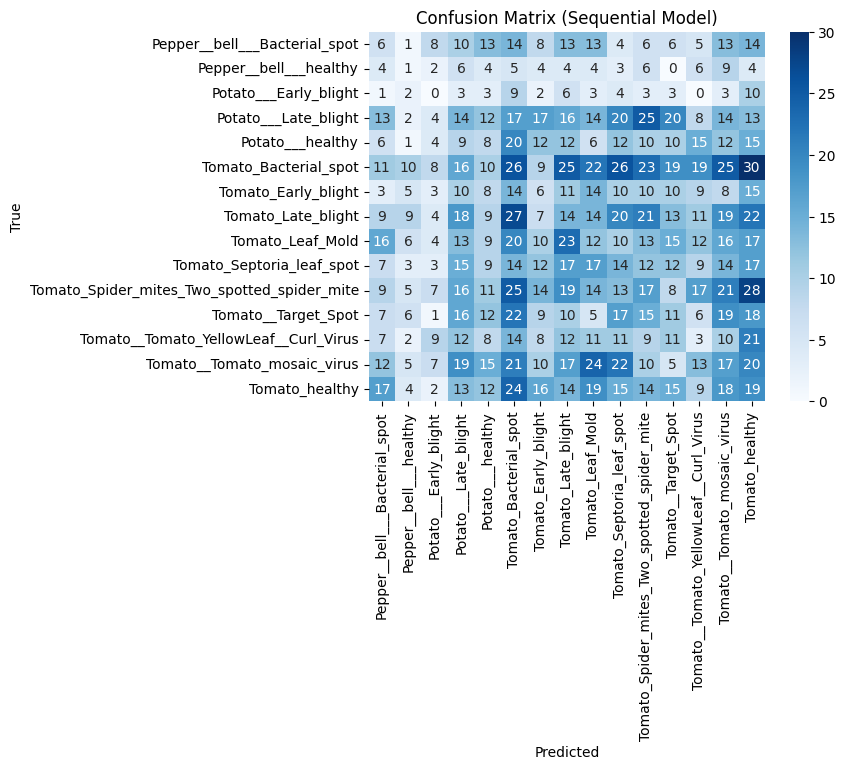

In [51]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Sequential Model)')
plt.show()


In [54]:
model,test_acc

(<keras.engine.sequential.Sequential at 0x1f974b1e1f0>, 0.9315544962882996)

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [39]:
model.save("Crop.h5")